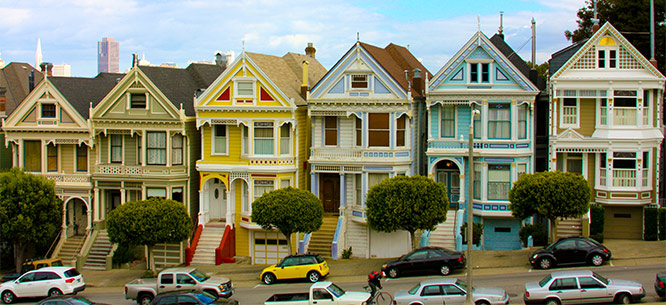

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housing Median Age: Median age of a house within a block; a lower number is a newer building
4. total Rooms: Total number of rooms within a block
5. total Bedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. median Income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. median House Value: Median house value for households within a block (measured in US Dollars)
10. ocean Proximity: Location of the house w.r.t ocean/sea

# Importing libraries & dataset

In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# preprocessing functions
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

#algorithms
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# evaluation functions
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Data exploration & cleansing

In [5]:
housing = pd.read_csv("housing.csv")

In [6]:
housing.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
lower = housing["housing_median_age"].quantile(0.25)
upper = housing["housing_median_age"].quantile(.75)

In [11]:
housing.loc[(housing["housing_median_age"] <lower) | (housing["housing_median_age"] > upper)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND


**since that there some outliers less than the quart of the data am gonna to cap them to .25 & .75 quartile at feature engineering section**

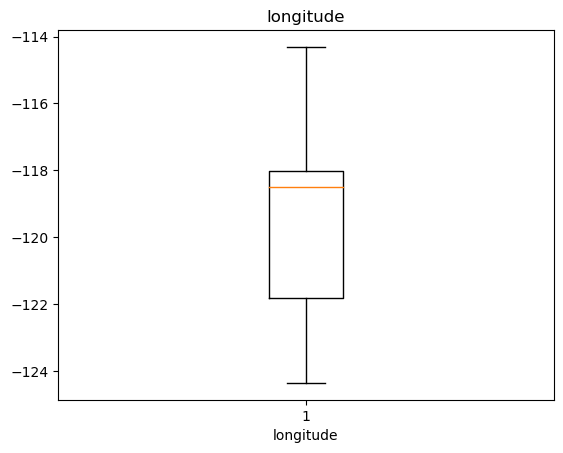

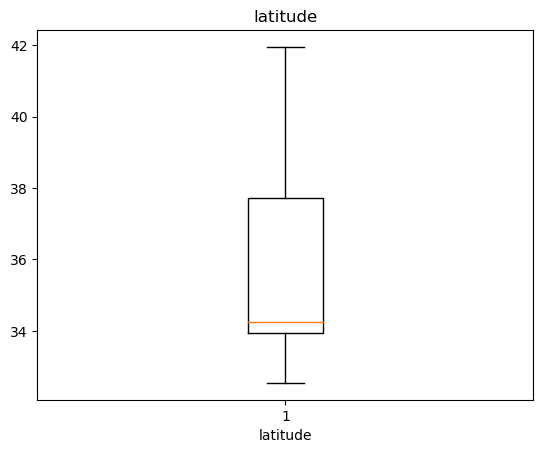

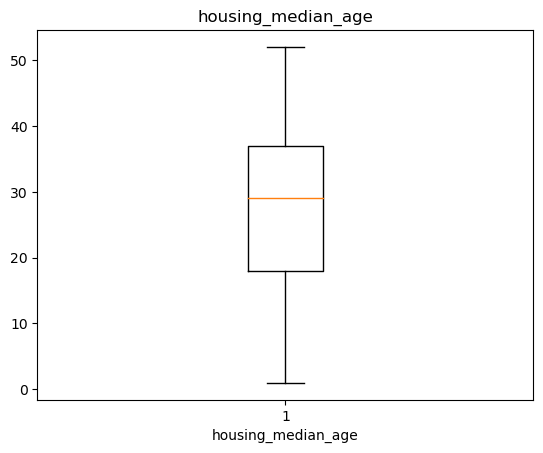

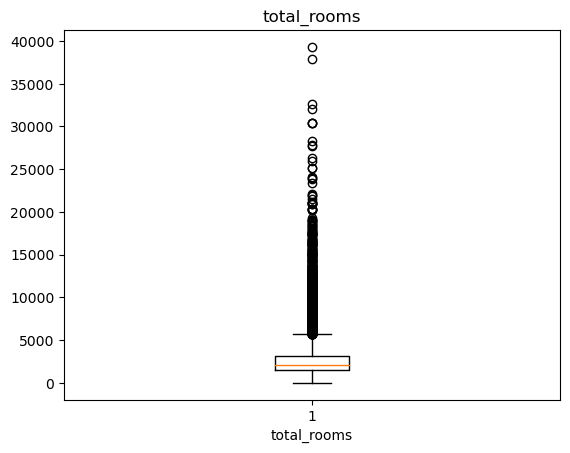

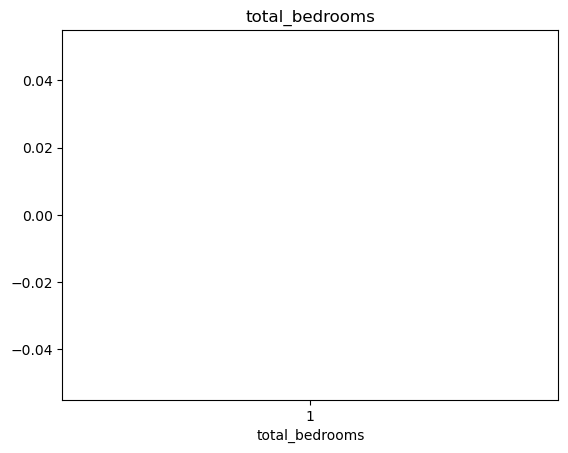

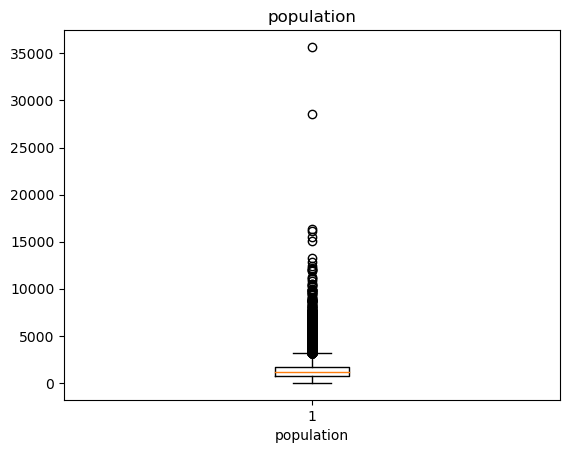

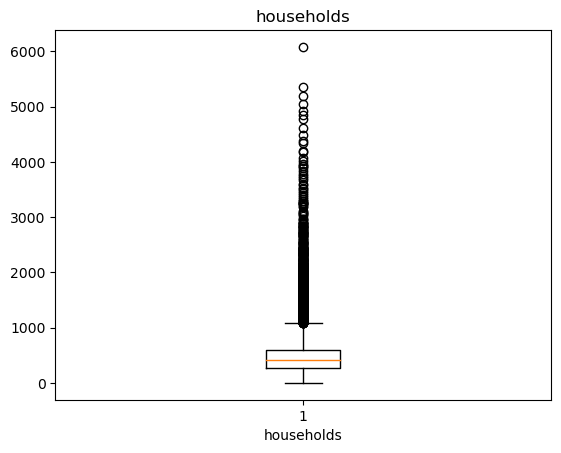

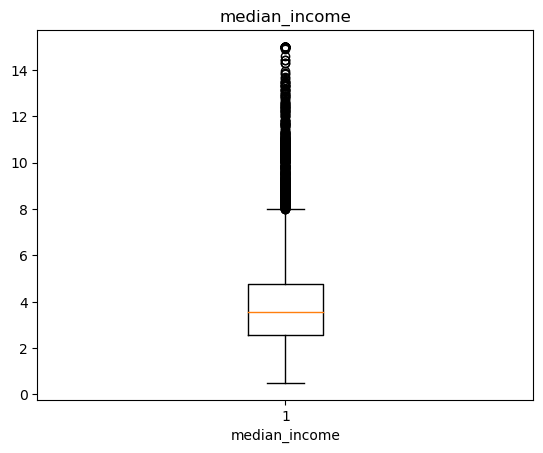

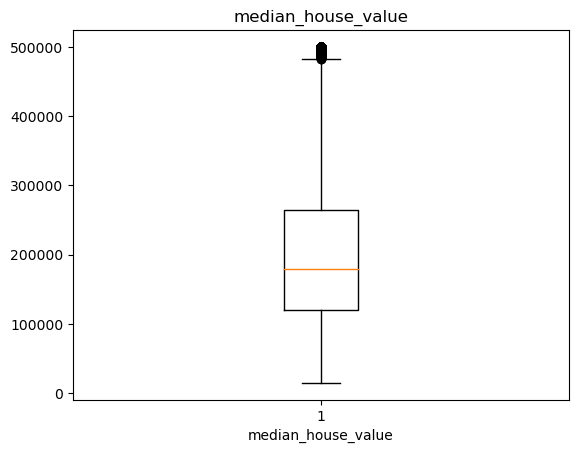

In [12]:
for column in housing.columns:
    if column == "median_house_value":
        break
    ax = plt.boxplot(data=housing, x = column)
    plt.title(column)
    plt.xlabel(column)
    plt.show()
plt.boxplot(data=housing, x = "median_house_value")
plt.xlabel("median_house_value")
plt.title("median_house_value")
plt.show()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

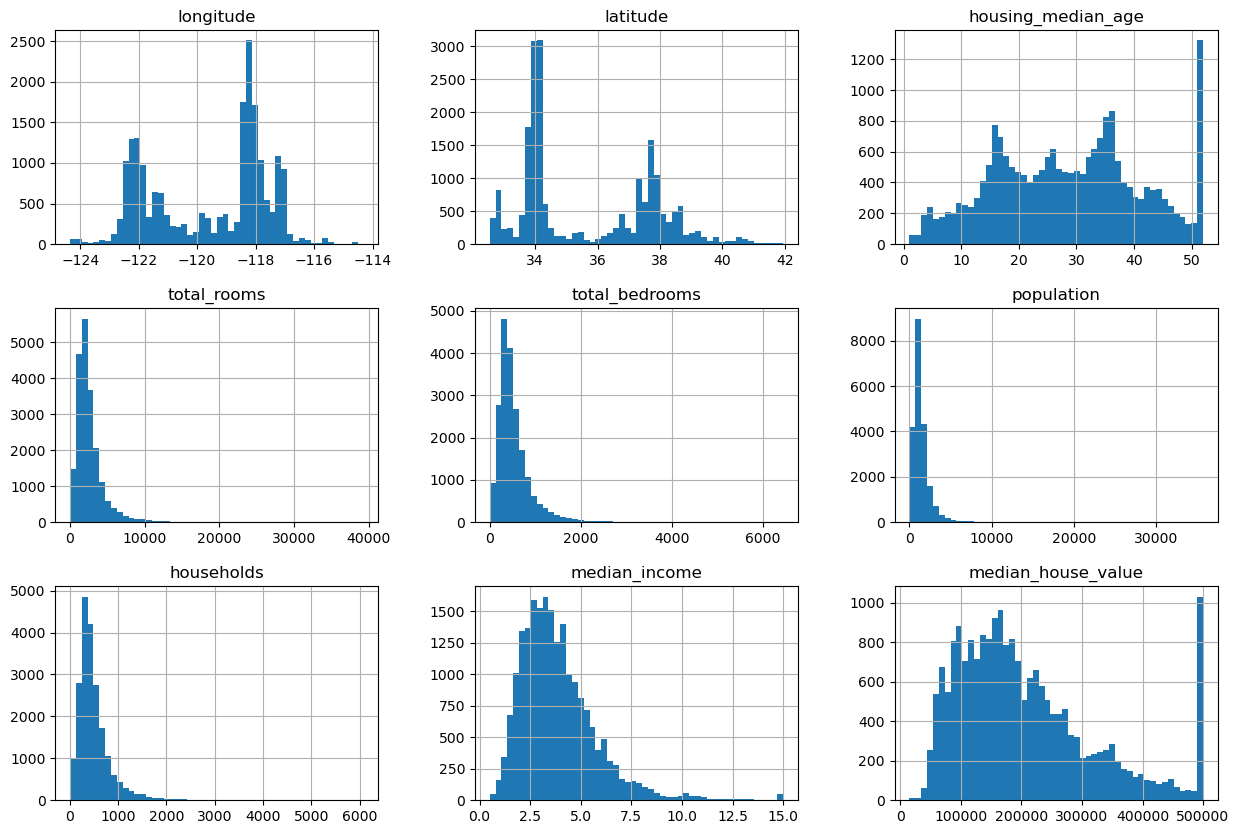

In [13]:
housing.hist(figsize=(15,10), bins = 50, grid=True)

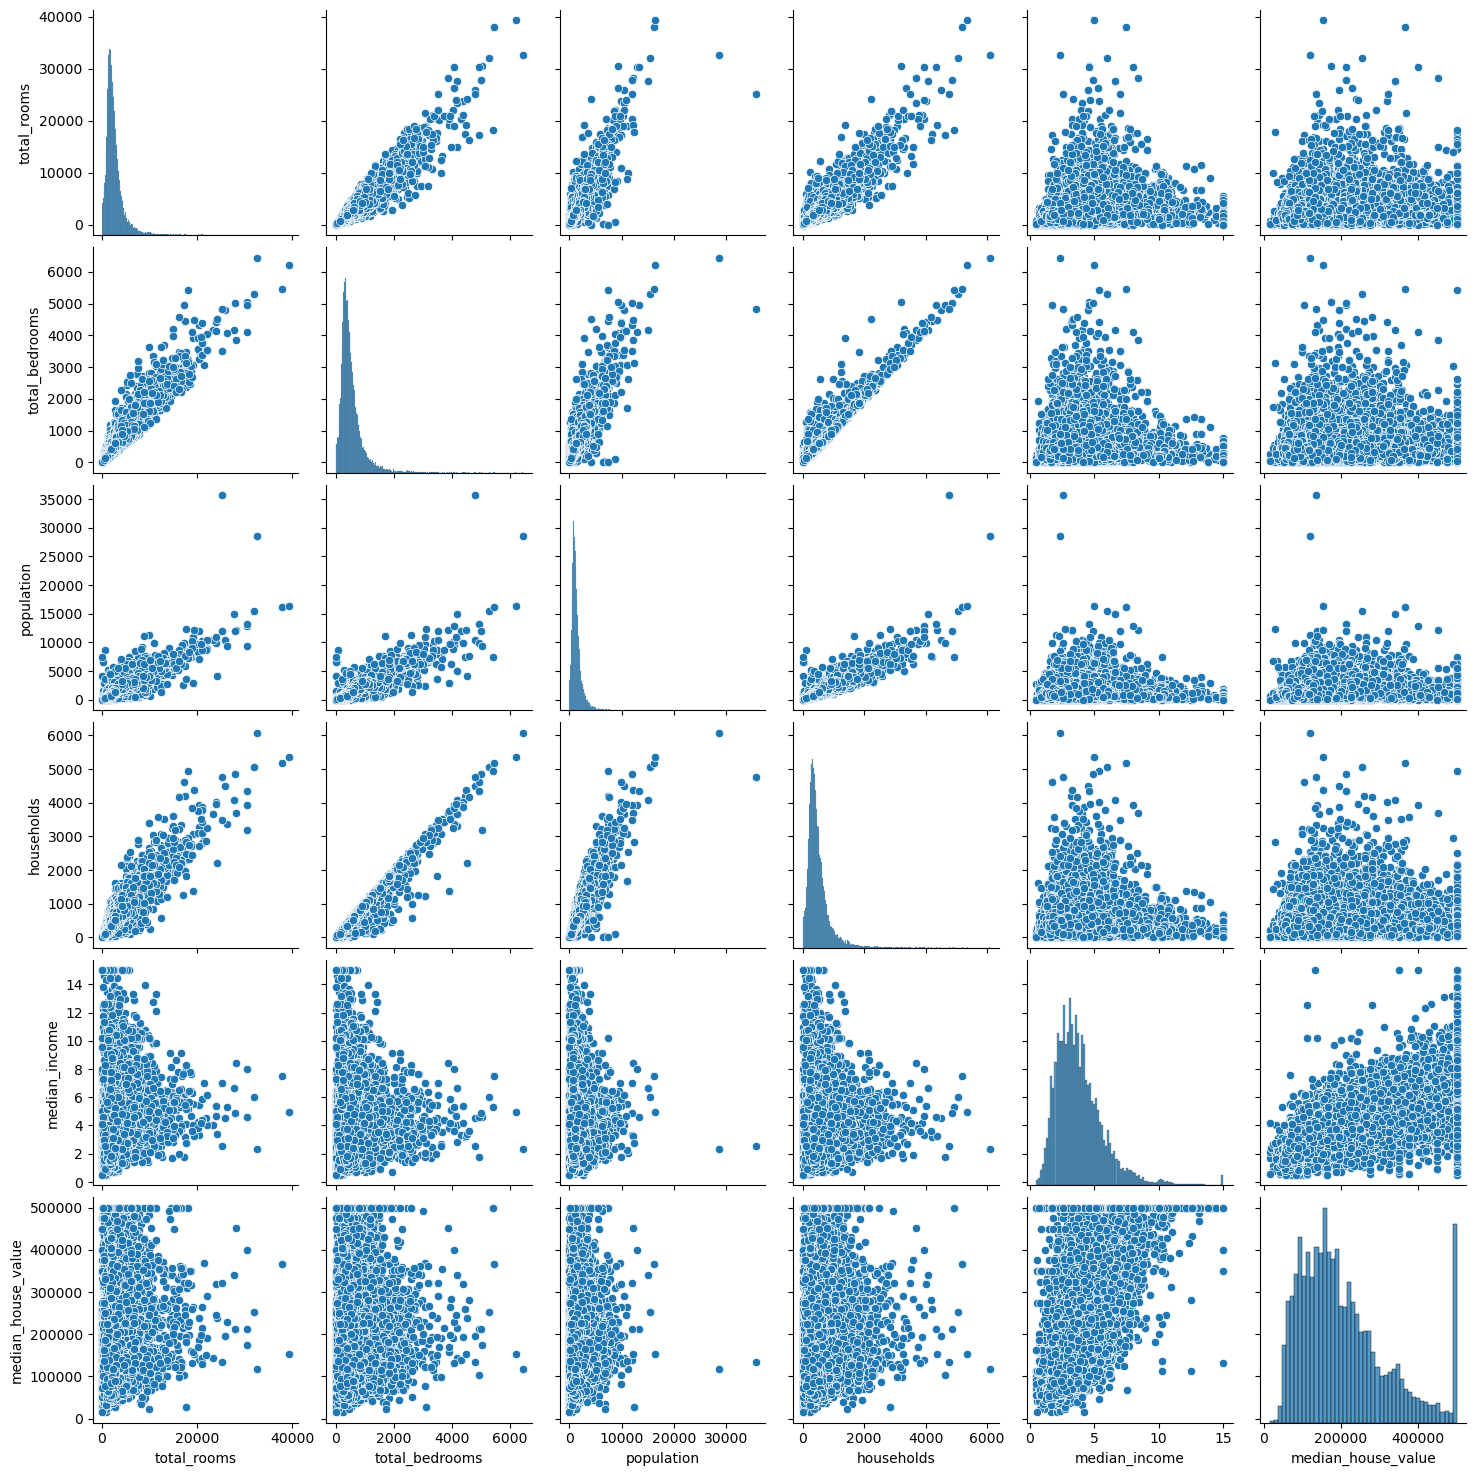

In [14]:
features = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
sns.pairplot(data = housing[features], palette=["red", "blue"])

<Axes: xlabel='median_house_value', ylabel='ocean_proximity'>

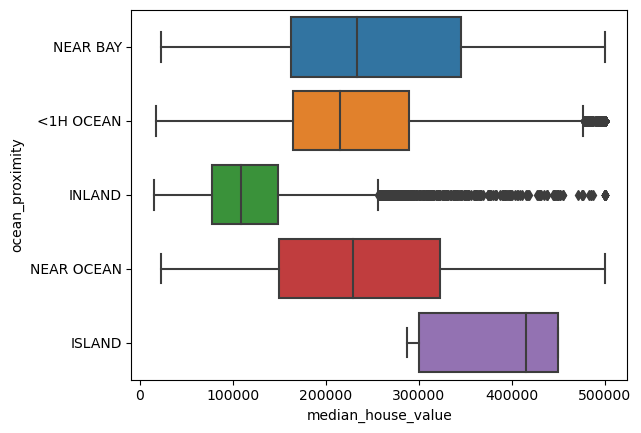

In [15]:
sns.boxplot(data = housing, x = "median_house_value", y = "ocean_proximity")

<Axes: >

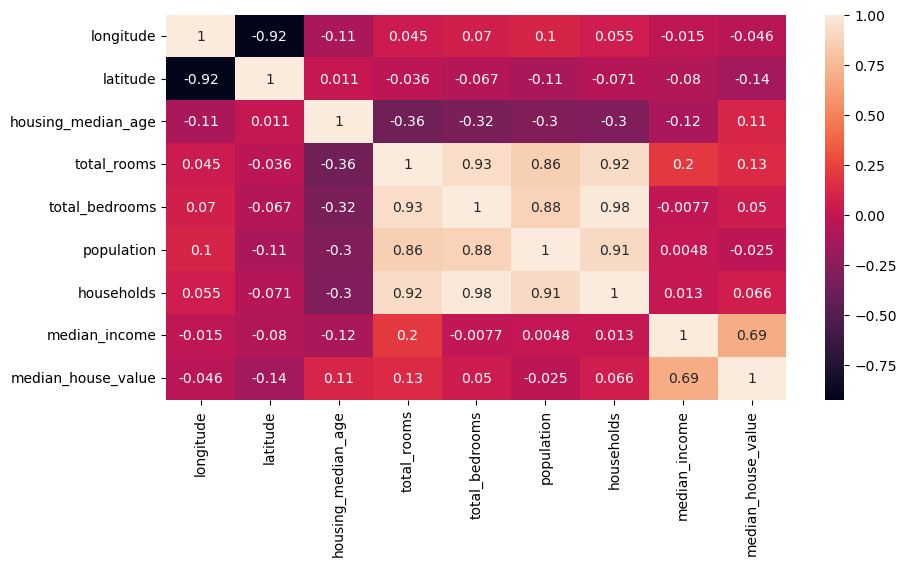

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(housing.corr(), annot=True)

# Feature engineering

In [17]:
housing.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [18]:
housing = housing.fillna(housing["total_bedrooms"].mode()[0])

In [19]:
features = housing.drop(columns="ocean_proximity").columns
fixed = []

In [20]:
def outlier_detect(df, feature):
    for i in feature:
        Q1 = df[i].quantile(.25)
        Q3 = df[i].quantile(.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5* IQR
        upper_bound = Q3 + 1.5* IQR
        lower_bound = math.floor(lower_bound)
        upper_bound = math.floor(upper_bound)
        fixed.append((lower_bound, upper_bound))
    return fixed

In [21]:
outlier_detect(housing, features)

[(-128, -113),
 (28, 43),
 (-11, 65),
 (-1103, 5698),
 (-235, 1170),
 (-620, 3132),
 (-208, 1092),
 (-1, 8),
 (-98088, 482412)]

In [22]:
for feature, value in zip(features, fixed):
    lower_bound, upper_bound = value
    housing[feature] = np.where(housing[feature] > upper_bound, upper_bound,
                            np.where(housing[feature] < lower_bound, lower_bound, housing[feature]))

In [23]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2441.669089,500.090068,1336.959012,468.990552,3.800577,205981.199031
std,2.003532,2.135952,12.585558,1397.735558,285.994253,765.550830,265.438153,1.656559,113217.286802
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,5698.000000,1170.000000,3132.000000,1092.000000,8.000000,482412.000000


# Preperaing data for the model

In [24]:
X = housing.drop(columns = "median_house_value")
y = housing["median_house_value"]

In [25]:
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [8])], remainder= "passthrough" )
X = ct.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
sc = StandardScaler()
sc1 = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = sc1.fit_transform(np.array(y_train).reshape(-1,1)) 
y_test = sc1.transform(np.array(y_test).reshape(-1,1))

# Model Building

In [28]:
# RandomForestRegressor
rfr = RandomForestRegressor(random_state= 42, n_estimators = 2000, n_jobs = -1)


# XGBooster
xgb = XGBRegressor(random_state = 42, learning_rate = 0.01,
                    n_estimators = 2000, booster = 'gbtree', max_depth = 8, min_child_weight = 10 ,
                    base_score = 0.8, gamma = 0, subsample = 0.7, colsample_bytree = 0.7,
                    nthread = 4, reg_lambda = 0.0571,
                    seed = 27, reg_alpha = 0.006, n_jobs = -1)


# Model Evaluation

#### RandomForest Regressor

MSE

In [120]:
cv_rfr_mse = -cross_val_score(rfr, X_train, y_train, scoring="neg_mean_squared_error", cv= 5)

In [121]:
print("                               result.mean()        result.std()")
print(f"RandomForestRegressor result: ({cv_rfr_mse.mean()}, {cv_rfr_mse.std()})")

                               result.mean()        result.std()
RandomForestRegressor result: (0.18382966881834223, 0.007123647756475511)


R2 score

In [122]:
cv_rfr_r2 = cross_val_score(rfr, X_train, y_train, scoring="r2", cv= 5)

In [123]:
print(f"R2 score:  {round(cv_rfr_r2.mean() * 100, 2)} %")

R2 score:  81.62 %


#### XGBoost

MSE

In [124]:
cv_xgb_mse =  -1 * cross_val_score(xgb, X_train, y_train, scoring="neg_mean_squared_error", cv= 5)

In [125]:
print("                   result.mean()        result.std()")
print(f"XGBoost result: ({cv_xgb_mse.mean(), cv_xgb_mse.std()})")

                   result.mean()        result.std()
XGBoost result: ((0.15611603709961938, 0.004869358086541824))


R2 score

In [126]:
cv_xgb_r2 =  cross_val_score(xgb, X_train, y_train, scoring="r2", cv = 5)

In [127]:
print(f"R2 score:  {round(cv_xgb_r2.mean() *100, 2)} %")

R2 score:  84.39 %


# Result

we see that the XGB boost performed well and has the higher score among all used algorithms